In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from scipy import ndimage
import scipy.ndimage.filters
from sklearn.decomposition import PCA, FastICA
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def get_init_V(data_fmri: np.ndarray, n_components: int) -> np.ndarray:
    S, n, p1, _ = data_fmri.shape
    X = data_fmri.reshape(S*n, p1, p1)
    X = X.reshape(S*n, p1 * p1) #in 2 steps in case it causes problems
    k = n_components
    ica_estimator = FastICA(
                    n_components=k, max_iter=400, whiten="arbitrary-variance", tol=15e-5)
    ica_estimator.fit(X)

    components = ica_estimator.components_[:k]
    
    return components

In [14]:
n = 200
time_series_map1 = np.cos(2*np.pi*np.linspace(0, 1, n, endpoint=False))
time_series_map2 = np.sin(2*np.pi*np.linspace(0, 1, n, endpoint=False))
time_series = np.array([time_series_map1, time_series_map2]).transpose((1,0))
time_series.shape

(200, 2)

In [15]:
#Create an easy test dataset to see if the method is working or not
latent_global_maps = np.load("latent_global_maps.npy")
latent_global_maps = latent_global_maps[:2]
latent_global_maps.shape

(2, 49, 49)

/var/folders/9k/c2_qmgms5bv_gzkb9tf_tc1w0000gn/T/ipykernel_14726/2201162465.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


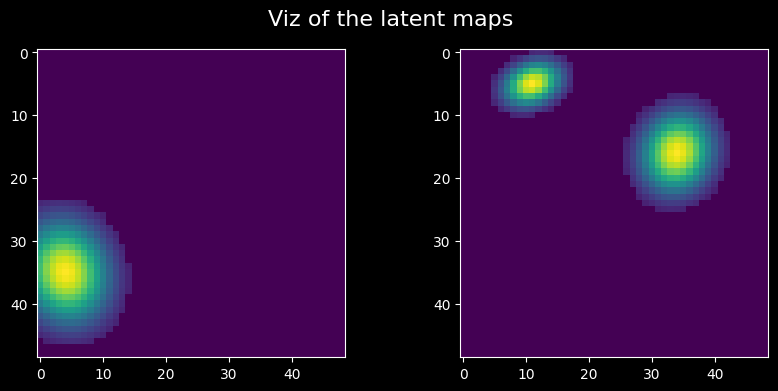

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle(f'Viz of the latent maps', fontsize=16)
ax[0].imshow(latent_global_maps[0])
ax[1].imshow(latent_global_maps[1])
fig.show()

In [17]:
nbSubjects = 6
data_fmri = time_series @ latent_global_maps.reshape(2, -1)
data_fmri = data_fmri.reshape(n, 49, 49)
data_fmri = np.tile(data_fmri.reshape((1, 200, 49, 49)), (nbSubjects, 1, 1, 1))
data_fmri.shape

(6, 200, 49, 49)

/var/folders/9k/c2_qmgms5bv_gzkb9tf_tc1w0000gn/T/ipykernel_14726/1162794816.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


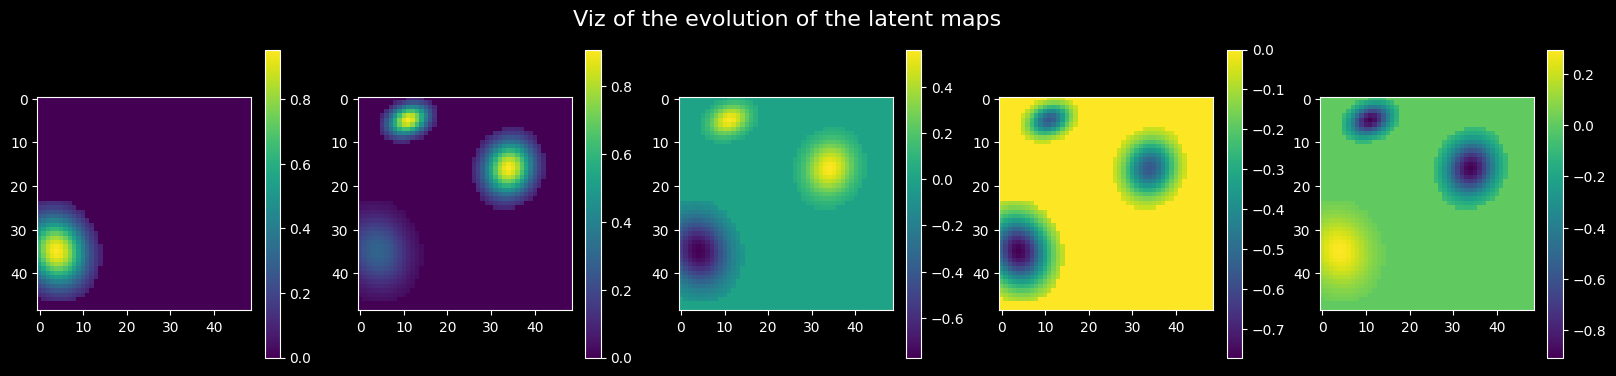

In [18]:
fig, ax = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle(f'Viz of the evolution of the latent maps', fontsize=16)
for i in range(n//40):
    im = ax[i].imshow(data_fmri[0,i*(n//5), :, :], cmap="viridis")
    plt.colorbar(im, ax=ax[i])
fig.show()

In [8]:
def plot_latent_maps(V: np.ndarray, n_components: int) -> None:
    fig, ax = plt.subplots(1, n_components, figsize=(20, 4))
    fig.suptitle(f'Initialization of the {n_components} latent maps', fontsize=16)
    for i in range(n_components):
        ax[i].imshow(V[i, :,:], cmap="inferno")
    fig.show()

In [29]:
V = get_init_V(data_fmri, n_components=2)

In [30]:
V.shape

(2, 49, 49)

In [ ]:
def regularizer(self, V: np.ndarray):
        _, k = V.shape
        norm1_v = np.sum(np.abs(V))
        quadratic_term = 0
        for i in range(k):
            quadratic_term += 0.5 * (V[:, i].T @ self.L @ V[:, i])
        return norm1_v + quadratic_term
